<a href="https://colab.research.google.com/github/ShihaoCui/the-craft-of-selfteaching/blob/master/Crack_Localization_by_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input,GRU
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import keras
# numpy.matrix.mean
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D,Conv1D, MaxPooling1D,Convolution1D
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import pickle
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as scio
import math

In [21]:
# this function is to show the confusion matrix
def comfusion_matrix_show(model,x_test,y_test):
    # predicted results
    y_pred = model.predict(x_test)
    # get the position of result
    y_pred_classes = np.argmax(y_pred,axis = 1)
    # get the postion of test data
    y_true = np.argmax(y_test,axis = 1)
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10,5))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", color = 'g');
    return plt

In [22]:
!git clone https://github.com/ShihaoCui/MyData.git
# !ls -R

fatal: destination path 'MyData' already exists and is not an empty directory.


In [23]:
## Data Load
filenames = './MyData/Fet_19.csv'
data = np.loadtxt(filenames, delimiter=',')
data = data.reshape(996,19,19)

In [24]:
## Data Load
filenames = './MyData/Fet0_19.csv'
data0= np.loadtxt(filenames, delimiter=',')
data0 = data0.reshape(996,19,19)

In [25]:
# data = np.divide(data,data0)

In [26]:
# train data and test data split 
ts = 5
test_no = []
for i in range(ts,995,20):
    test_no.append(i)
len(test_no)
# test_no


50

In [27]:
# 10 labels
label_size = 10
label = []
for i in range(1,label_size+1,1):
    label.append(i)
y = []
for i in range(data.shape[0]):
    if 0<=i<=98:
        y.append(0)
    if 99<=i<=198:
        y.append(1)
    if 199<=i<=298:
        y.append(2)
    if 299<=i<=398:
        y.append(3)
    if 399<=i<=498:
        y.append(4)
    if 499<=i<=598:
        y.append(5)
    if 599<=i<=698:
        y.append(6)
    if 699<=i<=798:
        y.append(7)
    if 799<=i<=898:
        y.append(8)
    if 899<=i<=data.shape[0]:
        y.append(9)
y = np.array(y)
y.shape

(996,)

In [28]:
y = np_utils.to_categorical(y,num_classes = 10)

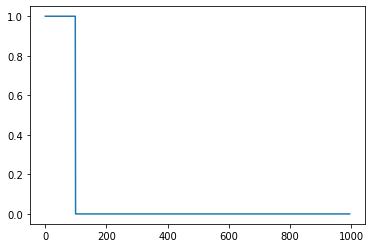

In [33]:
plt.plot(y[:,0])

In [34]:
data0 = data
y0 = y
x_test = data0[test_no,:,:]
y_test = y0[test_no,:]
x_train = np.delete(data0, test_no, 0)
y_train = np.delete(y0, test_no, 0)

In [35]:
np.set_printoptions(threshold=np.inf)
# x_train.shape

In [36]:
# y_train.shape
# y

In [37]:
model= Sequential()
# model.add(Embedding(10000,8,input_length=6))

model.add(Conv1D(4,kernel_size=4,batch_input_shape=(None,19,19),padding='same'))
# model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(4,kernel_size=4,padding='same'))
model.add(LSTM(20,return_sequences=True))
# model.add(LSTM(8,return_sequences=True))
model.add(Flatten())
model.add(Dense(2080))
# model.add(Activation('relu'))
model.add(Dense(200))
# model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dense(10, activation='softmax'))
model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 19, 4)             308       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 19, 4)             68        
_________________________________________________________________
lstm_1 (LSTM)                (None, 19, 20)            2000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 380)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2080)              792480    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               416200    
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

Epoch 1/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.1803 - accuracy: 0.0941 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 2/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1813 - accuracy: 0.0973 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 3/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1801 - accuracy: 0.0835 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 4/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1803 - accuracy: 0.0951 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 5/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1802 - accuracy: 0.0835 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 6/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1801 - accuracy: 0.0941 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 7/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1800 - accuracy: 0.0846 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch

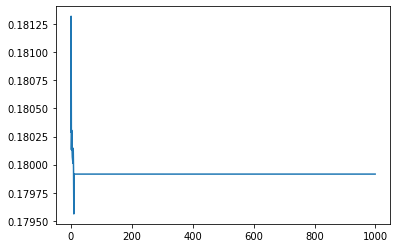

In [38]:
history = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))
# Loss: convergence or not
plt.plot(history.history['loss'])
plt.show()

In [39]:
# the accuracy of the test data
loss, acc = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.1000


In [40]:
y_test.shape

(50, 10)

In [41]:
x_test.shape

(50, 19, 19)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

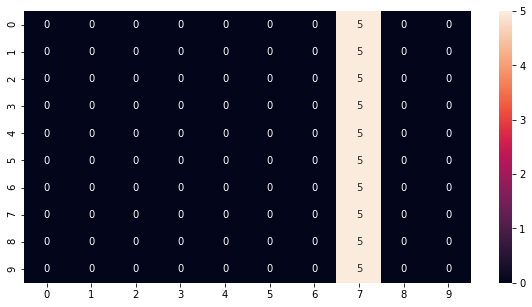

In [42]:
comfusion_matrix_show(model,x_test,y_test)